In [1]:
import sys
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer as lb
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
from numpy.linalg import norm

In [2]:
df=pd.read_csv('bank_marketing.csv',sep=';')
df.head()
df_null_count=df.isnull().sum()
df['pdays'].unique()
df_copy=df.copy()
df_copy.head()
df[df.isna().any(axis=1)]

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
358,358,33,self-employed,married,basic.9y,unknown,no,no,cellular,jul,...,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [3]:
df_fillna = pd.DataFrame(df.fillna(df_copy['pdays'].mean()))
df_fillna.isnull().sum()
df_fillna_copy = df_fillna.copy()
df_fillna[df_fillna.isna().any(axis=1)]

df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              40000 non-null  int64  
 1   age             40000 non-null  int64  
 2   job             40000 non-null  object 
 3   marital         40000 non-null  object 
 4   education       40000 non-null  object 
 5   default         40000 non-null  object 
 6   housing         40000 non-null  object 
 7   loan            40000 non-null  object 
 8   contact         40000 non-null  object 
 9   month           40000 non-null  object 
 10  day_of_week     40000 non-null  object 
 11  duration        40000 non-null  int64  
 12  campaign        40000 non-null  int64  
 13  pdays           40000 non-null  float64
 14  previous        40000 non-null  int64  
 15  poutcome        40000 non-null  object 
 16  emp.var.rate    40000 non-null  float64
 17  cons.price.idx  40000 non-null 

In [4]:
df_categorical=df_fillna.loc[:,df_fillna.dtypes == np.object]
df_numerical=df_fillna.drop(df_categorical.columns,axis=1)
df_categorical_features = pd.DataFrame()
df_categorical_features = df_categorical.drop('subscription', axis='columns')
df_numerical_features = df_numerical.drop('id', axis='columns')

In [5]:
df_numerical_normdf=df_numerical.copy()

def min_max_scaled(df_min_max_scaled,column):
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

for col in df_numerical.columns:
      min_max_scaled(df_numerical_normdf,col)

In [6]:
df_numerical_normdf = df_numerical_normdf.drop('id', axis='columns')

In [7]:
df_numerical_normdf.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


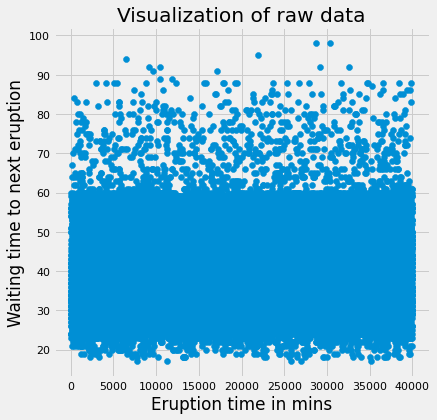

In [8]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs,make_circles,make_circles

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');


In [9]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(3)
pca_df = pca.fit_transform(df_numerical_normdf)


In [40]:
def rand_center(data,k): 
    idx = np.random.choice(len(data), k, replace=False)
    centroids = data[idx, :]
    return centroids
 
def converged(centroids1, centroids2): 
    converge = False 
    Threshold = 0.00001
    print("in converged function\n")
    distance = np.zeros(centroids1.shape[0])
    for i in range(5):
        distance[i] = norm(centroids1[i] - centroids2[i], axis=0)
    #when the centroids are close enough i.e., distance is less than threshold we stop the iterations
    if(np.sum(np.square(distance))<Threshold):
        converge = True
    return converge

    pass 
 
def update_centroids(data, centroids, k): 
    distances = cdist(data, centroids ,'euclidean')
    points = np.array([np.argmin(i) for i in distances])
    print("In the update centroid fn")
    centroids = []
    for idx in range(5):
      #Updating Centroids by taking mean of Cluster it belongs to
      temp_cent = data[points==idx].mean(axis=0) 
      centroids.append(temp_cent)
 
    centroids = np.vstack(centroids) #Updated Centroids 
    label = points
 
    return centroids,label

def kmeans(data,k): 
    """ 
    >>> Main function of your k-Means implementation 
    """ 
    # step 1: 
    centroids = rand_center(data,k) 
    converge = False 
    while not converge: 
        old_centroids = np.copy(centroids) 
        # step 2 & 3; labels can be an array of labels for all the data points 
        centroids, label = update_centroids(data, old_centroids,5) 
        # step 4 
        converge = converged(old_centroids, centroids) 
    print(">>> final centroids") 
    print(centroids) 
    return centroids, label

def compute_sse(X, labels, centroids):
    distance = np.zeros(X.shape[0])
    for k in range(5):
        distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
    return np.sum(np.square(distance))

In [41]:
def percentage_calculation(X,Y):
    pca_df_kmean_imp_cluster = pd.DataFrame(Y, columns=['cluster'])
    temp= pd.concat([X,pca_df_kmean_imp_cluster],axis=1)
    print("yes_count.  total.    percentage")

    df_cluster1 = temp.loc[temp['cluster'] == 0]
    cluster1_count = df_cluster1['subscription'].count()
    cluster1_true_count = df_cluster1.loc[df_cluster1['subscription'] == "yes"]['subscription'].count()
    cluster1_perc = (cluster1_true_count)/(cluster1_count)
    print(cluster1_true_count,cluster1_count,cluster1_perc)

    df_cluster2 = temp.loc[temp['cluster'] == 1]
    cluster2_count = df_cluster2['subscription'].count()
    cluster2_true_count = df_cluster2.loc[df_cluster2['subscription'] == "yes"]['subscription'].count()
    cluster2_perc = (cluster2_true_count)/(cluster2_count)
    print(cluster2_true_count,cluster2_count,cluster2_perc)

    df_cluster3 = temp.loc[temp['cluster'] == 2]
    cluster3_count = df_cluster3['subscription'].count()
    cluster3_true_count = df_cluster3.loc[df_cluster3['subscription'] == "yes"]['subscription'].count()
    cluster3_perc = (cluster3_true_count)/(cluster3_count)
    print(cluster3_true_count,cluster3_count,cluster3_perc)

    df_cluster4 = temp.loc[temp['cluster'] == 3]
    cluster4_count = df_cluster4['subscription'].count()
    cluster4_true_count = df_cluster4.loc[df_cluster4['subscription'] == "yes"]['subscription'].count()
    cluster4_perc = (cluster4_true_count)/(cluster4_count)
    print(cluster4_true_count,cluster4_count,cluster4_perc)

    df_cluster5 = temp.loc[temp['cluster'] == 4]
    cluster5_count = df_cluster5['subscription'].count()
    cluster5_true_count = df_cluster5.loc[df_cluster5['subscription'] == "yes"]['subscription'].count()
    cluster5_perc = (cluster5_true_count)/(cluster5_count)
    print(cluster5_true_count,cluster5_count,cluster5_perc)
    
    print("gini")
    cluster1_gini = 1-(cluster1_perc*cluster1_perc)-((1-cluster1_perc)*(1-cluster1_perc))
    print("cluster1:", cluster1_gini)
    cluster2_gini = 1-(cluster2_perc*cluster2_perc)-((1-cluster2_perc)*(1-cluster2_perc))
    print("cluster2:", cluster2_gini)
    cluster3_gini = 1-(cluster3_perc*cluster3_perc)-((1-cluster3_perc)*(1-cluster3_perc))
    print("cluster3:", cluster3_gini)
    cluster4_gini = 1-(cluster4_perc*cluster4_perc)-((1-cluster4_perc)*(1-cluster4_perc))
    print("cluster4:", cluster4_gini)
    cluster5_gini = 1-(cluster5_perc*cluster5_perc)-((1-cluster5_perc)*(1-cluster5_perc))
    print("cluster5:", cluster5_gini)
    

In [42]:
from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
#pca_array = np.array(df_pca)
#imputer = imputer.fit(pca_array)
centroids, label = kmeans(pca_df,5)

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

>>> final centroids
[[ 1.00908647  0.41932974 -0.04684233]
 [-0.50521773 -0.06018672  0.12520108]
 [ 0.75934643 -0.20774107  0.0579237 ]
 [-0.4185378   0.10824503 -0.10474503]
 [-0.05840627 -0.11293718 -0.10748933]]


In [36]:
sse = compute_sse(pca_df,label,centroids)
print("SSE of implementation:" , sse)

SSE of implementation: 2063.140389167993


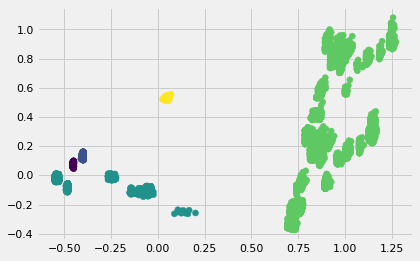

In [14]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=label);

In [98]:
percentage_calculation(df_fillna,label)
sh_3=sklearn.metrics.silhouette_score(pca_df, label, metric='euclidean', sample_size=None, random_state=None)
print("silhoutte score for scikit learn k means:",sh_3)

yes_count.  total.    percentage
726 16155 0.04493964716805943
1600 9768 0.1638001638001638
662 1892 0.3498942917547569
579 10731 0.05395582890690523
939 1454 0.6458046767537826
gini
cluster1: 0.08584015056093941
cluster2: 0.2739393402784067
cluster3: 0.454936552704388
cluster4: 0.10208919486774803
cluster5: 0.4574819924734499
silhoutte score for scikit learn k means: 0.6144263891079786


In [37]:
centroids=[0]*20
labels=[0]*20
ind=0
min=1000000
for i in range(20):
  centroids[i],labels[i] = kmeans(pca_df,5)
  sse_val=compute_sse(pca_df,labels[i],centroids[i])
  if(sse_val<min):
    min=sse_val
    ind=i
  print("SSE Value:",sse_val)

print("K means with best clustering:\n")
print("optimal centroids:\n",centroids[ind])
print("optimized Labels:\n",labels[ind])
print("Minimum SSE VALUE:\n",min)

In the update centroid fn
in converged function

In the update centroid fn
in converged function

>>> final centroids
[[-0.396981    0.13281779 -0.03977251]
 [-0.05777771 -0.11326916 -0.10776543]
 [-0.4508579   0.07062683 -0.20324041]
 [ 0.8322706  -0.02463621  0.02733199]
 [-0.50521773 -0.06018672  0.12520108]]
SSE Value: 2739.430524606762
In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

>>> final centroids
[[-0.4508579   0.07062683 -0.20324041]
 [ 1.00951588  0.42002381 -0.0475163 ]
 [ 0.75937863 -0.20735702  0.05807275]
 [-0.50521773 -0.06018672  0.12520108]
 [-0.28999805  0.05519936 -0.06122402]]
SSE Value: 1908.1025705575694
In the update centr

In [38]:
sse_kmeans_20 = compute_sse(pca_df,labels[ind],centroids[ind])
print("SSE of implementation after 20 iterations:" , sse_kmeans_20)

SSE of implementation after 20 iterations: 1298.830345291271


In [93]:
percentage_calculation(df_fillna,labels[ind])
sh_1=sklearn.metrics.silhouette_score(pca_df, labels[ind], metric='euclidean', sample_size=None, random_state=None)
print("silhoutte score for implemented k means:",sh_1)

yes_count.  total.    percentage
939 1455 0.6453608247422681
579 10731 0.05395582890690523
1600 9767 0.16381693457561175
726 16155 0.04493964716805943
662 1892 0.3498942917547569
gini
cluster1: 0.45774046126049517
cluster2: 0.10208919486774803
cluster3: 0.27396189304372287
cluster4: 0.08584015056093941
cluster5: 0.454936552704388
silhoutte score for implemented k means: 0.6144241434543496


In [ ]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=labels[ind]);
l = labels[ind]
c = centroids[ind]
plt.scatter(c[:,0], c[:,1], s=100, color="red");

In [49]:

pca_df_sklearn = pca_df.copy()
km_sklearn = KMeans(n_clusters=5, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
#km_sklearn.fit(pca_df_sklearn)
label = km_sklearn.fit_predict(pca_df_sklearn)
print("SSE for Scikitlearn Kmeans:", km_sklearn.inertia_)

SSE for Scikitlearn Kmeans: 1298.8297444584186


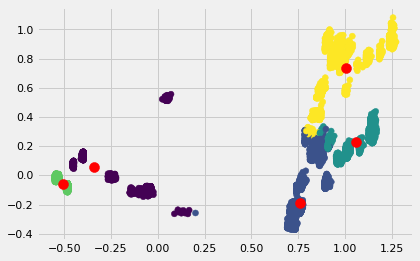

In [50]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=km_sklearn.labels_);
plt.scatter(km_sklearn.cluster_centers_[:,0], km_sklearn.cluster_centers_[:,1], s=100, color="red");

In [94]:
percentage_calculation(df_fillna,km_sklearn.labels_)
sh_2=sklearn.metrics.silhouette_score(pca_df, km_sklearn.labels_, metric='euclidean', sample_size=None, random_state=None)
print("silhoutte score for scikit learn k means:",sh_2)

yes_count.  total.    percentage
726 16155 0.04493964716805943
1600 9768 0.1638001638001638
662 1892 0.3498942917547569
579 10731 0.05395582890690523
939 1454 0.6458046767537826
gini
cluster1: 0.08584015056093941
cluster2: 0.2739393402784067
cluster3: 0.454936552704388
cluster4: 0.10208919486774803
cluster5: 0.4574819924734499
silhoutte score for scikit learn k means: 0.6144263891079786


In [188]:
from sklearn.cluster import KMeans
def bisecting_kmeans(pca_array):
  bisecting_kmeans_data = pca_array
  K = 5
  current_clusters = 1
  while current_clusters != K:
      kmean1 = KMeans(n_clusters=2, init='random').fit(bisecting_kmeans_data)
      print(kmean1.cluster_centers_)
      current_clusters += 1
      #print(current_clusters)
      cluster_centers = kmean1.cluster_centers_
      sse = [0]*3
      for point, label in zip(bisecting_kmeans_data, kmean1.labels_):
          sse[label] += np.square(point-cluster_centers[label]).sum()
      chosen_cluster = np.argmax(sse, axis=0)
      chosen_cluster_data = bisecting_kmeans_data[kmean1.labels_ == chosen_cluster]
      bisecting_kmeans_data = chosen_cluster_data
  return kmean1,current_clusters

In [216]:
min=100000
index=0
curr_clusters=0
kmss = [1]*15
for i in range(15):
  kmss[i],curr_clusters = bisecting_kmeans(pca_df)
  print(curr_clusters)
  if(kmss[i].inertia_<min):
    if(curr_clusters==5):
      min=kmss[i].inertia_
      index=i
    print(kmss[i].inertia_)

print("Optimal Bisecting K means:\n")
print("Minimum SSE val:",min)

[[-0.40590487  0.01201527 -0.01333002]
 [ 0.8322706  -0.02463621  0.02733199]]
[[ 0.75947816 -0.20715341  0.05817185]
 [ 1.00974747  0.42036313 -0.04785939]]
[[ 0.96849429  0.63509239  0.36042381]
 [ 1.04833065  0.22680206 -0.42038811]]
[[ 1.19407195  0.87674454 -0.06076357]
 [ 0.8969136   0.55841092  0.4940757 ]]
5
193.53643295611016
[[ 0.8322706  -0.02463621  0.02733199]
 [-0.40590487  0.01201527 -0.01333002]]
[[ 1.0120125   0.42369891 -0.05127322]
 [ 0.75987775 -0.20520763  0.05899101]]
[[ 1.04833065  0.22680206 -0.42038811]
 [ 0.97042917  0.64194237  0.36247482]]
[[ 0.89829393  0.56654273  0.49912008]
 [ 1.19481301  0.87648041 -0.06257381]]
5
187.28424716514425
[[-0.40590487  0.01201527 -0.01333002]
 [ 0.8322706  -0.02463621  0.02733199]]
[[ 0.75977766 -0.20564094  0.05881572]
 [ 1.0115255   0.42293827 -0.05051855]]
[[ 0.96989845  0.6400743   0.36184924]
 [ 1.04833065  0.22680206 -0.42038811]]
[[ 1.19481301  0.87648041 -0.06257381]
 [ 0.89796557  0.56446616  0.49758956]]
5
[[ 0.832

In [193]:
## Question 4
## K means for varying K


In [209]:
km_3 = KMeans(n_clusters=3, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_3.fit(pca_df)
sse3=km_3.inertia_
print("SSE for 3 clusters:",sse3)

km_4 = KMeans(n_clusters=4, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_4.fit(pca_df)
sse4=km_4.inertia_
print("SSE for 4 clusters:",sse4)

km_7 = KMeans(n_clusters=7, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_7.fit(pca_df)
sse7=km_7.inertia_
print("SSE for 7 clusters:",sse7)

km_10 = KMeans(n_clusters=10, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_10.fit(pca_df)
sse10=km_10.inertia_
print("SSE for 10 clusters:",sse10)

km_15 = KMeans(n_clusters=15, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_15.fit(pca_df)
sse15=km_15.inertia_
print("SSE for 15 clusters:",sse15)

km_20 = KMeans(n_clusters=20, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_20.fit(pca_df)
sse20=km_20.inertia_
print("SSE for 20 clusters:",sse20)

km_30 = KMeans(n_clusters=30, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_30.fit(pca_df)
sse30=km_30.inertia_
print("SSE for 30 clusters:",sse30)

km_50 = KMeans(n_clusters=50, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_50.fit(pca_df)
sse50=km_50.inertia_
print("SSE for 50 clusters:",sse50)

km_100 = KMeans(n_clusters=100, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_100.fit(pca_df)
sse100=km_100.inertia_
print("SSE for 100 clusters:",sse100)

km_500 = KMeans(n_clusters=500, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_500.fit(pca_df)
sse500=km_500.inertia_
print("SSE for 500 clusters:",sse500)

km_1000 = KMeans(n_clusters=1000, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_1000.fit(pca_df)
sse1000=km_1000.inertia_
print("SSE for 1000 clusters:",sse1000)

km_4000 = KMeans(n_clusters=4000, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_4000.fit(pca_df)
sse4000=km_4000.inertia_
print("SSE for 4000 clusters:",sse4000)

SSE for 3 clusters: 2680.0828910515634
SSE for 4 clusters: 2068.21277645309
SSE for 7 clusters: 643.509623744216
SSE for 10 clusters: 272.3073698249369
SSE for 15 clusters: 115.73989742218329
SSE for 20 clusters: 48.03303205890023
SSE for 30 clusters: 26.762990805935193
SSE for 50 clusters: 10.925512027457591
SSE for 100 clusters: 4.376858291642727
SSE for 500 clusters: 0.6035538599814751
SSE for 1000 clusters: 0.22484397978769413
SSE for 4000 clusters: 0.024679291238030764


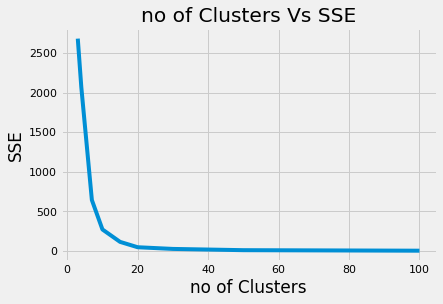

In [210]:
SSE=[sse3,sse4,sse7,sse10,sse15,sse20,sse30,sse50,sse100]
noc=[3,4,7,10,15,20,30,50,100]
plt.plot(noc, SSE)
plt.title('no of Clusters Vs SSE')
plt.xlabel('no of Clusters')
plt.ylabel('SSE')
plt.show()
#,sse100,sse500,sse1000,sse4000
#,100,500,1000,4000

In [43]:
#Question 5


In [44]:
pca = PCA(3)
pca_df_2 = pca.fit_transform(df_numerical_features) 

In [56]:
kmeans_wn = KMeans(n_clusters=5, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
kmeans_wn.fit(pca_df_2)

print("SSE for Scikitlearn norm Kmeans:", kmeans_wn.inertia_)

SSE for Scikitlearn norm Kmeans: 615888455.7529818


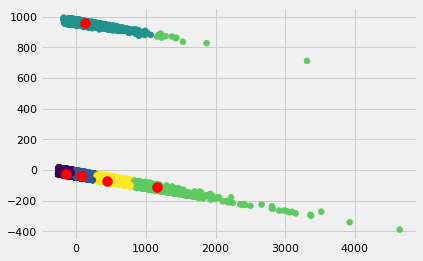

In [53]:
plt.scatter(pca_df_2[:,0],pca_df_2[:,1], c=kmeans_wn.labels_);
plt.scatter(kmeans_wn.cluster_centers_[:,0], kmeans_wn.cluster_centers_[:,1], s=100, color="red");

In [54]:
pca_df_sklearn = pca_df.copy()
km_sklearn = KMeans(n_clusters=5, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
#km_sklearn.fit(pca_df_sklearn)
label = km_sklearn.fit_predict(pca_df_sklearn)
print("SSE for Scikitlearn Kmeans:", km_sklearn.inertia_)

SSE for Scikitlearn Kmeans: 1298.8297444584184


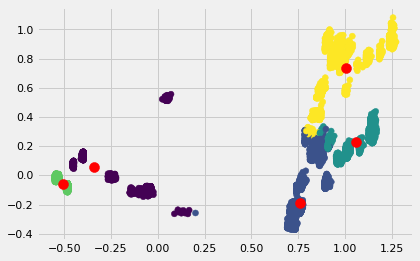

In [51]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=km_sklearn.labels_);
plt.scatter(km_sklearn.cluster_centers_[:,0], km_sklearn.cluster_centers_[:,1], s=100, color="red");

In [57]:
### Question 6

In [65]:
#columns with lowest mutual info from PA1
from sklearn.preprocessing import MinMaxScaler

df_copy6=pd.DataFrame()
df_copy6=pd.concat([df['age'],df['duration'],df['campaign']],axis = 1)
scaler = MinMaxScaler()
df_copy6_normalized=pd.DataFrame(scaler.fit_transform(df_copy6),columns=df_copy6.columns, index=df_copy6.index)


k means SSE for attributes age,duration,campaign, 241.73126319481318


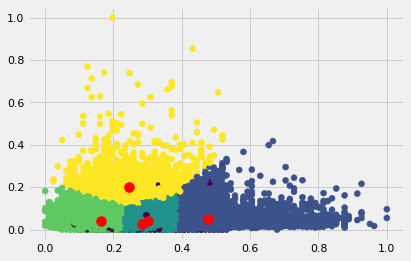

In [68]:
#implemented k means
km_6 = KMeans(n_clusters=5, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_6.fit(df_copy6_normalized)

print("k means SSE for attributes age,duration,campaign,",km_6.inertia_)
plt.scatter(df_copy6_normalized.iloc[:,0],df_copy6_normalized.iloc[:,1], c=km_6.labels_);
plt.scatter(km_6.cluster_centers_[:,0], km_6.cluster_centers_[:,1], s=100, color="red");

In [97]:
percentage_calculation(df_fillna,km_6.labels_)
sh_2=sklearn.metrics.silhouette_score(pca_df, km_sklearn.labels_, metric='euclidean', sample_size=None, random_state=None)
print("silhoutte score for scikit learn k means:",sh_2)

yes_count.  total.    percentage
21 1009 0.02081268582755203
1139 8374 0.1360162407451636
757 13711 0.05521114433666399
1477 14694 0.10051721791207295
1112 2212 0.5027124773960217
gini
cluster1: 0.04075903587239127
cluster2: 0.23503164599743465
cluster3: 0.10432574775540004
cluster4: 0.18082701363057951
cluster5: 0.4999852849327522
silhoutte score for scikit learn k means: 0.6144263891079786


In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

>>> final centroids
[[-0.05840627 -0.11293718 -0.10748933]
 [-0.50521773 -0.06018672  0.12520108]
 [ 0.75937082 -0.20762201  0.05797966]
 [-0.4185378   0.10824503 -0.10474503]
 [ 1.00922308  0.41953242 -0.04706032]]
k means(impl) SSE for attributes age,duration,campaign, [3 3 3 ... 3 4 3]


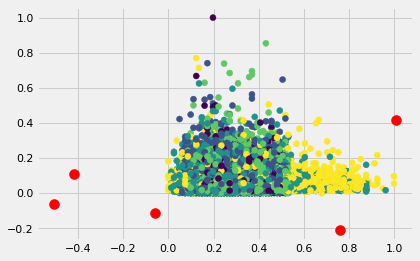

In [75]:
centroids_6, label_6 = kmeans(pca_df,5)
print("k means(impl) SSE for attributes age,duration,campaign,",label_6)
plt.scatter(df_copy6_normalized.iloc[:,0],df_copy6_normalized.iloc[:,1], c=label_6);
plt.scatter(centroids_6[:,0], centroids_6[:,1], s=100, color="red");

In [96]:
percentage_calculation(df_fillna,label_6)

yes_count.  total.    percentage
204 3526 0.057855927396483264
579 10731 0.05395582890690523
1408 9287 0.1516097771077851
523 12630 0.04140934283452098
1792 3826 0.4683742812336644
gini
cluster1: 0.10901723812315223
cluster2: 0.10208919486774803
cluster3: 0.25724850518622566
cluster4: 0.07938921832106827
cluster5: 0.4979996278250253


In [70]:
#columns with highest mutual info from PA1
from sklearn.preprocessing import MinMaxScaler

df_copy7=pd.DataFrame()
df_copy7=pd.concat([df['nr.employed'],df['euribor3m'],df['cons.conf.idx']],axis = 1)
scaler = MinMaxScaler()
df_copy7_normalized=pd.DataFrame(scaler.fit_transform(df_copy7),columns=df_copy7.columns, index=df_copy7.index)


k means SSE for attributes nr.employed,euribor3m,cons.conf.idx, 375.5625817474006


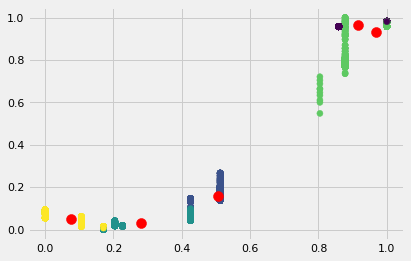

In [72]:
#implemented k means
km_7 = KMeans(n_clusters=5, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
km_7.fit(df_copy7_normalized)

print("k means SSE for attributes nr.employed,euribor3m,cons.conf.idx,",km_7.inertia_)
plt.scatter(df_copy7_normalized.iloc[:,0],df_copy7_normalized.iloc[:,1], c=km_7.labels_);
plt.scatter(km_7.cluster_centers_[:,0], km_7.cluster_centers_[:,1], s=100, color="red");

In [80]:
percentage_calculation(df_fillna,km_7.labels_)

yes_count.  total.    percentage
499 12562 0.03972297404871836
1321 9006 0.1466799911170331
1092 2562 0.4262295081967213
807 14325 0.05633507853403141
787 1545 0.5093851132686085
gini
cluster1: 0.07629011876288638
cluster2: 0.2503299426458805
cluster3: 0.4891158290782049
cluster4: 0.10632287492119175
cluster5: 0.49982383929787083


In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

In the update centroid fn
in converged function

>>> final centroids
[[-0.4508579   0.07062683 -0.20324041]
 [-0.39771908  0.13357233 -0.03983364]
 [ 0.81061637 -0.11921184 -0.01803352]
 [-0.39449753 -0.07310621  0.06748165]
 [ 1.00724543  0.74132359  0.39474445]]
k means(impl) SSE for attributes age,duration,campaign, [1 1 1 ... 1 2 0]


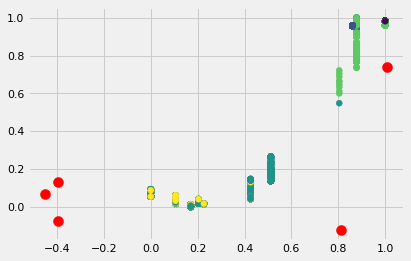

In [100]:
centroids_7, label_7 = kmeans(pca_df,5)
print("k means(impl) SSE for attributes age,duration,campaign,",label_7)
plt.scatter(df_copy7_normalized.iloc[:,0],df_copy7_normalized.iloc[:,1], c=label_7);
plt.scatter(centroids_7[:,0], centroids_7[:,1], s=100, color="red");

In [85]:
percentage_calculation(df_fillna,label_7)

yes_count.  total.    percentage
596 1499 0.3975983989326217
1189 8711 0.1364940879347951
572 1702 0.33607520564042304
1305 26884 0.04854188364826663
844 1204 0.7009966777408638
gini
cluster1: 0.47902782419767503
cluster2: 0.2357269037872871
cluster3: 0.44625732358834075
cluster4: 0.09237113836028943
cluster5: 0.4192006710742707


In [91]:
sh=sklearn.metrics.silhouette_score(pca_df, label_7, metric='euclidean', sample_size=None, random_state=None)
print("silhoutte score for :",sh)

silhoutte score for : 0.7616520482857911


In [90]:
print(sh)

0.7616520482857911
